In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("http://data.insideairbnb.com/italy/sicilia/sicily/2021-09-30/visualisations/listings.csv")

In [3]:
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,7011,SEASIDE - Historic Antique Residence,16888,Salinara Yu&Ad,NaN,Marsala,37.84047,12.47778,Entire home/apt,170,3,30,2019-05-18,0.40,9,338,2,NaN
1,22948,B&B NEAR STATION ROOM WITH BALCONY,88837,Giuseppe,NaN,Agrigento,37.30885,13.58582,Private room,22,1,289,2019-09-23,2.92,4,73,29,NaN
2,28379,Apartment in Taormina - Rinaldo,121867,Francesca,NaN,Taormina,37.85172,15.28420,Entire home/apt,60,2,265,2021-07-05,2.50,5,283,17,NaN
3,35264,Etna-sea a panoramic villa,151644,Serena,NaN,Piedimonte Etneo,37.82464,15.15739,Entire home/apt,68,2,144,2021-09-10,1.32,4,365,2,NaN
4,40182,Casa Vacanze Hipparis,172482,Francesco,NaN,Vittoria,36.89101,14.43056,Entire home/apt,47,7,1,2020-08-16,0.07,1,365,0,NaN


In [4]:
#convertendo Euro para Reais
def converteReais(registro):
  return float(registro['price'])*6.33 #dado adquirido dia 19 de nov de 2022 após o fechamento da IBOV

In [5]:
df['Preço em R$'] = df.apply(converteReais, axis=1)

Quantos atributos (variáveis) e quantas entradas o conjunto de dados possui? Quais tipos das variáveis?

In [6]:
print("Variáveis:\t {}".format(df.shape[0]))
print("Entradas:\t {}\n".format(df.shape[0]))

display(df.dtypes)

Variáveis:	 47925
Entradas:	 47925



id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group               float64
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
Preço em R$                       float64
dtype: object

Qual a porcentagem de valores ausentes no dataset?

In [7]:
(df.isnull().sum()/df.shape[0]).sort_values(ascending=False)

neighbourhood_group               1.000000
license                           0.993219
reviews_per_month                 0.299927
last_review                       0.299927
host_name                         0.003693
name                              0.000083
id                                0.000000
number_of_reviews                 0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
price                             0.000000
minimum_nights                    0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
host_id                           0.000000
Preço em R$                       0.000000
dtype: float64

Tipo de distribuição das variáveis?

array([[<AxesSubplot:title={'center':'id'}>,
        <AxesSubplot:title={'center':'host_id'}>,
        <AxesSubplot:title={'center':'neighbourhood_group'}>,
        <AxesSubplot:title={'center':'latitude'}>],
       [<AxesSubplot:title={'center':'longitude'}>,
        <AxesSubplot:title={'center':'price'}>,
        <AxesSubplot:title={'center':'minimum_nights'}>,
        <AxesSubplot:title={'center':'number_of_reviews'}>],
       [<AxesSubplot:title={'center':'reviews_per_month'}>,
        <AxesSubplot:title={'center':'calculated_host_listings_count'}>,
        <AxesSubplot:title={'center':'availability_365'}>,
        <AxesSubplot:title={'center':'number_of_reviews_ltm'}>],
       [<AxesSubplot:title={'center':'Preço em R$'}>, <AxesSubplot:>,
        <AxesSubplot:>, <AxesSubplot:>]], dtype=object)

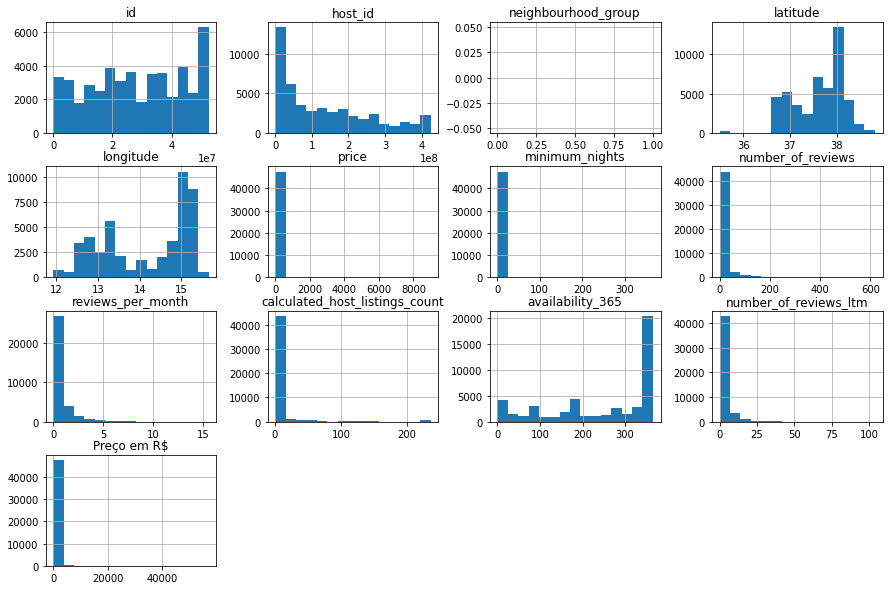

In [8]:
df.hist(bins=15, figsize=(15,10))

Temos outliers?

In [9]:
df[['price','minimum_nights','number_of_reviews', 'reviews_per_month','calculated_host_listings_count','availability_365' ]].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
count,47925.000000,47925.000000,47925.000000,33551.000000,47925.000000,47925.000000
mean,99.315576,3.112029,13.256734,0.706529,9.766865,247.134064
std,213.829368,7.658613,31.982888,1.015591,29.570741,127.196762
min,9.000000,1.000000,0.000000,0.010000,1.000000,0.000000
25%,49.000000,1.000000,0.000000,0.110000,1.000000,153.000000
50%,67.000000,2.000000,2.000000,0.340000,2.000000,303.000000
75%,100.000000,3.000000,11.000000,0.860000,5.000000,363.000000
max,9000.000000,365.000000,618.000000,15.540000,236.000000,365.000000


Boxplot para minimum_nights

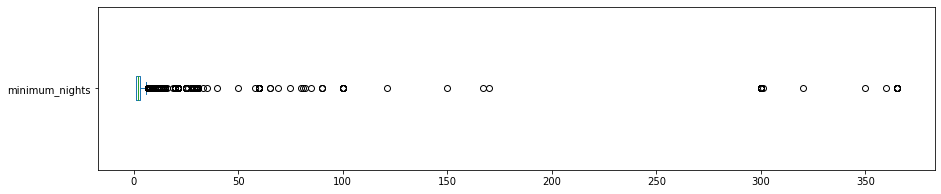

minimum_night: valores acima de 30:
65 entradas
0.1356%


In [10]:
#minimum_nights

df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#quantidade de valores acima de 30 dias para minimum_nights
print("minimum_night: valores acima de 30:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

Bloxpot para price

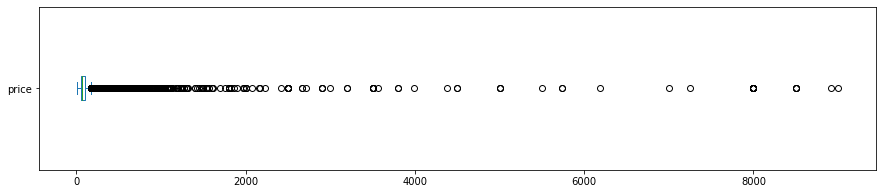


price: valores acima de 50:
32648 entradas
68.1231%


In [11]:
#price

df.price.plot(kind='box', vert=False, figsize=(15,3))
plt.show()

#quantidade de valores acima de 30 dias para minimum_nights
print("\nprice: valores acima de 50:")
print("{} entradas".format(len(df[df.price > 50])))
print("{:.4f}%".format((len(df[df.price > 50]) / df.shape[0])*100))

Histogramas sem outliers


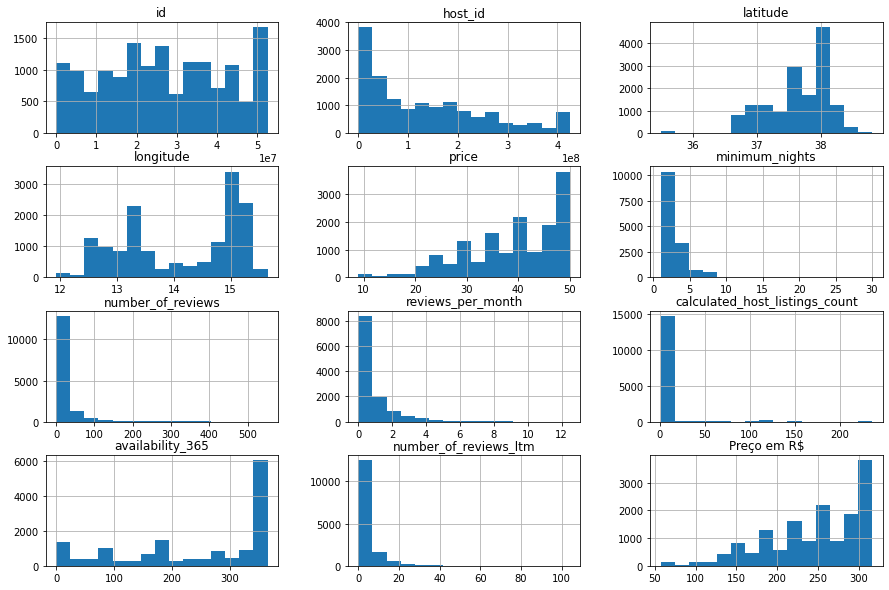

In [12]:
#removendo outliers em um novo DataFrame
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 50].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#remover neghbourhood_group porque ta nighbourd_group
df_clean.drop('neighbourhood_group', axis=1, inplace=True)

#plotando o histograma para as variaveis numericas
df_clean.hist(bins=15, figsize=(15,10));

Correlação existente entre as variáveis

In [13]:
#matriz de correlação
corr = df_clean[['price','minimum_nights', 'number_of_reviews','reviews_per_month','calculated_host_listings_count', 'availability_365']].corr();

display(corr);

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,0.035678,-0.057420,-0.054600,-0.083667,0.024908
minimum_nights,0.035678,1.000000,-0.091413,-0.132425,0.014064,-0.041873
number_of_reviews,-0.057420,-0.091413,1.000000,0.494770,-0.062448,-0.015340
reviews_per_month,-0.054600,-0.132425,0.494770,1.000000,-0.020855,0.009196
calculated_host_listings_count,-0.083667,0.014064,-0.062448,-0.020855,1.000000,0.001754
availability_365,0.024908,-0.041873,-0.015340,0.009196,0.001754,1.000000


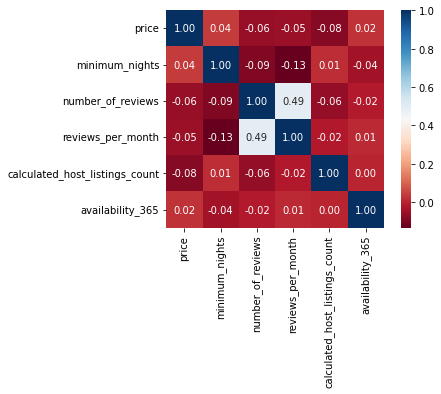

In [14]:
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, linecolor='white', annot=True);

Qual o imovel mais alugado?

In [15]:
#mostrando quantidade de cada tipo de imovel disponivel
df_clean.room_type.value_counts()

Entire home/apt    11407
Private room        3680
Hotel room            92
Shared room           64
Name: room_type, dtype: int64

In [16]:
#mostrando a porcentagem de cada tipo de imovel disponivel
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.748344
Private room       0.241422
Hotel room         0.006036
Shared room        0.004199
Name: room_type, dtype: float64

Localidade mais cara na Sicilia?

In [26]:
df_clean.groupby(['neighbourhood']).price.mean().sort_values(ascending=False)[:10]

neighbourhood
Lucca Sicula         50.000000
Antillo              50.000000
Moio Alcantara       50.000000
Burgio               49.666667
Rod Milici           49.333333
Ramacca              49.000000
Tripi                49.000000
Joppolo Giancaxio    47.400000
Villabate            46.333333
Gibellina            46.000000
Name: price, dtype: float64

In [18]:
#ver quantidade de imoveis na Valdina
print(df[df.neighbourhood == "Piana degli Albanesi"].shape)

#as 4 entradas da Valdina
df[df.neighbourhood == "Piana degli Albanesi"]

(12, 19)


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,Preço em R$
12062,14989760,Camera nel verde di Piana degli Albanesi,58965894,Alexandra,NaN,Piana degli Albanesi,38.00076,13.30153,Private room,47,1,0,NaN,NaN,1,364,0,NaN,297.51
24822,28796533,Pernottamento E Colazione in Maneggio,217190797,Daniela,NaN,Piana degli Albanesi,37.98862,13.29734,Private room,18,1,23,2019-09-11,0.63,1,274,0,NaN,113.94
24932,29041020,Sicily holiday,218866753,Pecoraro,NaN,Piana degli Albanesi,37.99384,13.27435,Private room,80,1,0,NaN,NaN,1,180,0,NaN,506.40
28232,33799872,Oasi Lega Internazionale Vigilanza - CAMERA 2,231420343,Alessio,NaN,Piana degli Albanesi,37.93218,13.38060,Private room,29,1,1,2019-04-22,0.03,2,0,0,NaN,183.57
33396,38920777,The house of wine,298083235,Alessandra,NaN,Piana degli Albanesi,37.99359,13.28870,Entire home/apt,65,1,7,2021-09-11,0.30,1,279,3,NaN,411.45
34177,40245538,"Masseria Rossella, Camera Matrimoniale Basic",310831043,Masseria,NaN,Piana degli Albanesi,37.94667,13.35174,Private room,1000,1,0,NaN,NaN,6,365,0,NaN,6330.00
34184,40253746,"Masseria Rossella, Camera Matrimoniale Superior",310831043,Masseria,NaN,Piana degli Albanesi,37.94723,13.35160,Private room,1000,1,0,NaN,NaN,6,365,0,NaN,6330.00
34188,40254271,"Masseria Rossella, Camera Tripla",310831043,Masseria,NaN,Piana degli Albanesi,37.94854,13.35096,Private room,1000,1,0,NaN,NaN,6,365,0,NaN,6330.00
34189,40254533,"Masseria Rossella, Camera Quadrupla",310831043,Masseria,NaN,Piana degli Albanesi,37.94906,13.35165,Private room,1000,1,0,NaN,NaN,6,365,0,NaN,6330.00
34190,40254715,"Masseria Rossella, Suite Primo Piano",310831043,Masseria,NaN,Piana degli Albanesi,37.94732,13.35099,Private room,1000,1,0,NaN,NaN,6,365,0,NaN,6330.00


In [19]:
import folium
from folium import plugins
from folium.plugins import HeatMap
from folium.plugins import FastMarkerCluster
import warnings
from folium import Choropleth, Circle, Marker
from folium.plugins import HeatMap, MarkerCluster
import math
from folium.plugins import MarkerCluster
from folium.plugins import HeatMap

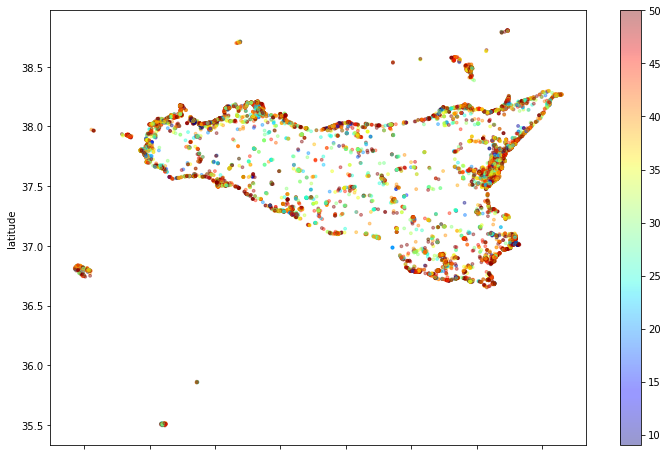

In [20]:
#plotar os imoveis pela latitude e longitude
df_clean.plot(kind="scatter", x='longitude', y='latitude', alpha=0.4, c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

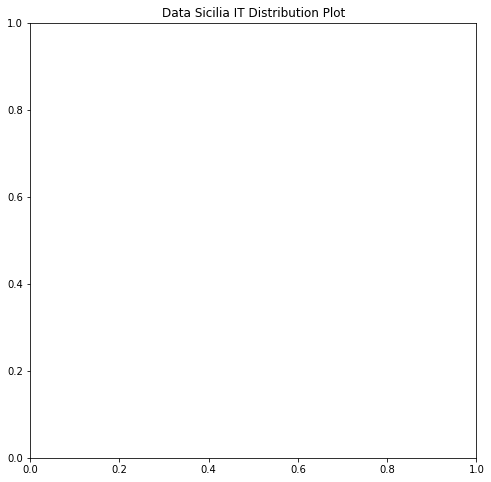

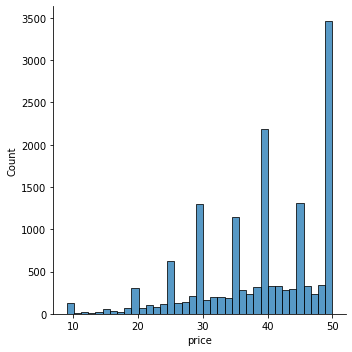

In [21]:
plt.figure(figsize=(8,8))

plt.title('Data Sicilia IT Distribution Plot')
sns.displot(df_clean['price'])